<a href="https://colab.research.google.com/github/chloejdmsw/portfolio/blob/main/TDI_Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Marketing Data Analysis for Main Street Books**
### TDI Data Analyst Boot Camp Capstone 
*June 2022*

Analyzed By: Chloe Walker 

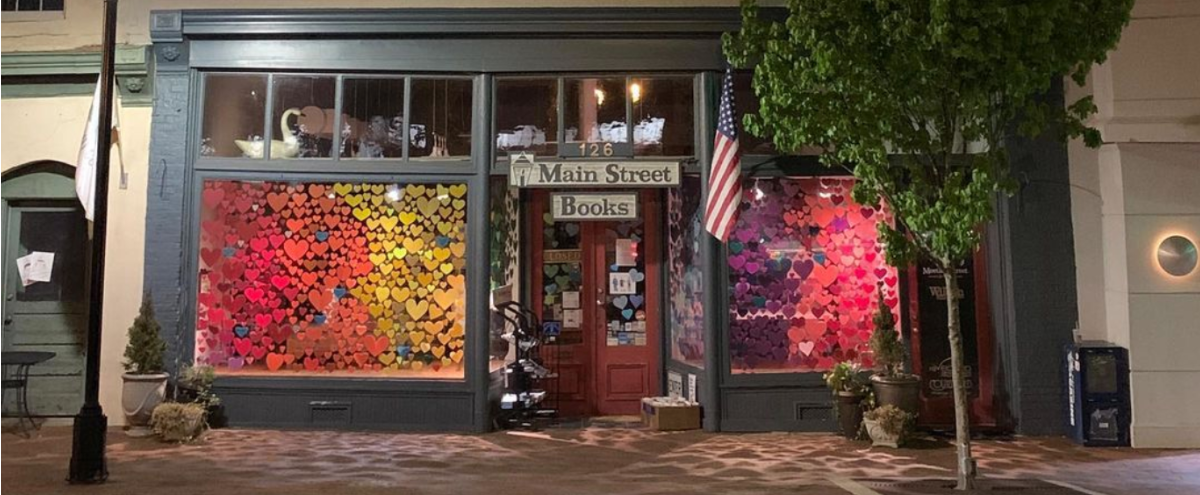


## Problem Statement ##

Independent boostores are the heartbeat of the book publishing industry. In March 2020 when the pandemic hit the nation, Amazon (which accounts for more than [half of book sales](https://time.com/5822767/coronavirus-bookstores-amazon/)) [deprioritized the sale of books.](https://www.publishersweekly.com/pw/by-topic/industry-news/bookselling/article/82713-amazon-deprioritizes-book-sales-amid-coronavirus-crisis.html). Independent book stores pivoted, and book sales remained steady overall with [online sales increasing](https://www.authorsguild.org/industry-advocacy/despite-pandemic-2020-u-s-book-sales-on-par-with-past-five-years/).  

In consultation with Main Street Books (MSB) owner, Adah Fitzgerald, I assessed MSB's data infrastructure, analyzed the data, and made recommendations for marketing strategy and future data collection/structure.

The underlying data for this project, along with the recommendations, remain proprietary to the business and contain sensitive customer information so I have not included them in this portfolio. The Data Assessment shows the code and strategies I used to automate data collection, clean data, merge data, and explore the data for analysis.  


#Data Assessment 
 
In order to best answer the problem statement, I needed to understand and map the data landscape at Main Street Books so that I can best use the available data to answer the business questions at hand, as well as make recommendations for data collection in the future. As a small business, they use a variety of tools to market and execute their business strategy including:
- [Book Sales Data from BookManager](https://colab.research.google.com/drive/1w96Niu4TfTv4WiZrsNlJ06K4UQMiwtWE#scrollTo=xie-vK0LRTL4)
- [Book Sales Data from Bookshop.org](https://colab.research.google.com/drive/1w96Niu4TfTv4WiZrsNlJ06K4UQMiwtWE#scrollTo=gLfKBXNpOJQ5)
- [Historical Book Sales Data from Square Space](https://colab.research.google.com/drive/1w96Niu4TfTv4WiZrsNlJ06K4UQMiwtWE#scrollTo=OUCS3iR68rCm)
-[Book Sales from Web Orders](https://colab.research.google.com/drive/1w96Niu4TfTv4WiZrsNlJ06K4UQMiwtWE#scrollTo=IGR8vpkf9ZV-)
-[Loyalty Customer Data](https://colab.research.google.com/drive/1w96Niu4TfTv4WiZrsNlJ06K4UQMiwtWE#scrollTo=HQXMJMox1CU0)
-[EventBrite Registration Data]
-[Zoom Registration Data]
- [No Registration Event Data]
- [MailChimp Individual Campaign Data]
- [MailChimp Summary Data]

Once the data is mapped, the next task is to wrangle the data by automating the processes of importing it to this notebook, cleaning it and merging it for analysis. 



# Sales Data

MSB's sales data comes from several places.  The largest source of information is Book Manager, their database of online and in-store purchases.  Prior to Book Manager, MSB used SquareSpace as their point of sale.  Additionally, they partner with Bookshop.org and Libro.fm on a commission basis. Libro.fm data was not available for this analysis. 

For this analysis, customer level data is only available for website orders, Bookshop.org, and historical data.  

## Book Sales Data (Book Manager Online Portal)

Bookmanager data has been downloaded from January 1, 2020-June 11, 2022. The data has been aggregated by Book Title and customer level data is not available. 

### Import Data


In [ ]:
#Bookmanager data import 
#Import must take place each time you add an event to ensure book title is in the data
#Data should be downloaded from BookManager by Section 
#Date range and Section should be in the document title in the following way:
# 'analytics_report_YYYYMMDD-YYYYMMDD_Section'

def import_analytics(files):
  '''This function grabs a list of Book Manager book sales files 
  (generated using glob), adds calculated columns, and concatenates
  '''

  frame = [] 
  for file in files:
    df = pd.read_excel(file, 
                       dtype= {"Cat": str, 
                               "Cat2": str,}) 
    df= df.drop(columns= ['aOH', 
                          'aOO', 
                          'TtlRcv'])
    df.dropna(how='all')
    df['Rtn'] = df['Rtn'].fillna(0)
    df['Section'] = file.split("_")[-1].split('.')[0]
    df['Date Range'] = file.split("_")[-2]
    df['Start Date'] = file.split("_")[-2].split('-')[0]
    df['End Date'] = file.split("_")[-2].split('-')[1]
    df['Sales Total'] = df['Sold']* df['Price']
    df['Return Total'] = df['Rtn']* df['Price']
    df['Net Sales Total'] = df['Sales Total'] - df['Return Total']
    df['Start Date'] = pd.to_datetime(df['Start Date'])
    df['End Date'] = pd.to_datetime(df['End Date'])
    df['Point of Sale'] = 'Bookmanager'
        #CW: Add ISBN as index 
    df = df.rename(
        columns={"Cat": "Class", 
                 "Cat2": "Subclass", 
                 "Supl": "Supplier", 
                 "Sold": "Units Sold",
                 "Price": "Unit Price",
                 "Rtn": "Units Returned"}) 
    df['Units Sold'] = df['Units Sold'].fillna(0)
    df['Unit Price'] = df['Unit Price'].fillna(0)
    df['Percent Sales Total'] = (df['Net Sales Total']/df['Net Sales Total'].sum())/100
    df = df.dropna(subset=['Title', 'Supplier'])
    df['Author'] = df['Author'].fillna('No Author')
    frame.append(df)
    df_book_sales = pd.concat(frame)
  return df_book_sales

#Import the files (there should one per section)

"""These files have to be downloaded individually from bookmanager by Section. 
The initials at the end of the name indicate the section, which is why the 
fuction above adds a column based on the name of the file. 
"""
bookmanager_files = glob.glob(
    '/content/drive/MyDrive/data/MSB_Book_Sales_Reports/analytics_report_2020*.xls')  

print("Sample: Book Manager Sales Data January 2020 through June 2022")
print()
df_bookmanager_sales = import_analytics(bookmanager_files)
df_bookmanager_sales.sample(5)

NameError: ignored

###Replace Null Values

In [ ]:
#Review BookManager Variables 
print("Book Manager Sales Data Variables")
print()
print(df_bookmanager_sales.info())
print()

#Check Bookmanager data for missing values 
print("Book Manager Sales Data-Total Null Values")
print()
print(df_bookmanager_sales.isnull().sum())
print()

##Check for Duplicates 
print("Number of duplicate rows:", df_bookmanager_sales.duplicated().sum())

Book Manager Sales Data Variables



NameError: ignored

###Explore the Data 

In [ ]:
# Section Types
# Fiction, Nonfiction, Kids, Gifts, Giftcards, Young Adult, Blank, Poetry, Local, Newspapers, Calendar 
print("Number of Sections:", df_bookmanager_sales['Section'].nunique())
print()
print("Section Names:",df_bookmanager_sales['Section'].unique())
print()

# CLass Types

print("Number of Classes:", df_bookmanager_sales['Class'].nunique())   ##CW: tried to sort but got error that different data types
print()
print("Class Types:", df_bookmanager_sales["Class"].unique())
print()

#Subclass Types

print("Number of Subclasses:", df_bookmanager_sales['Subclass'].nunique())
print()
print("Subclass Types:",df_bookmanager_sales['Subclass'].unique())
print()


# Authors 

print("Number of Unique Authors:", df_bookmanager_sales['Author'].nunique())
print()


#Books 

print("Number of Unique Titles:", df_bookmanager_sales['Title'].nunique())
print()

In [ ]:
#Filter out non-books(excludes gifts, giftcards, newspaper, calendars)
df_bookmanager_sales_books = df_bookmanager_sales.query(
    'Section == "FI" or Section == "NF" or Section == "KI" or Section == "YA" or Section == "Blank" or Section == "PO" or Section == "LO"')
df_bookmanager_sales_books.sample(10)

In [ ]:
df_bookmanager_sales[['Units Sold',
                      'Unit Price',
                      'Title',
                      'Author', 
                      'Class',
                      'Subclass',
                      'Supplier',
                      'Units Returned',
                      'ISBN',
                      'Section',
                      'Point of Sale',
                      'Percent Sales Total']].to_csv(
                          r'/content/drive/MyDrive/data/Tableau/Bookmanager_Sales.csv', index=False)

In [ ]:
print("The following Classes do not have a Section assigned:")
print()
df_bookmanager_sales_books[[
    'Section', 
    'Class', 
    'Units Sold', 
    'Sales Total', 
    'Net Sales Total']].query(
    'Section == "Blank"').groupby(
        ['Class']).sum()


In [ ]:
print("Summary of Class and Subclass")
print()
df_bookmanager_sales_books_categories = df_bookmanager_sales_books.query('Section != "Blank"').groupby(['Class', 'Subclass']).sum()
df_bookmanager_sales_books_categories

###Analyze the 2020-2022 Sales Data 

In [ ]:
print("The Top 20 Selling Titles by Sales Total:")
print()
df_bookmanager_sales_books[[
                            'Title',
                            'Author',
                            'Units Sold', 
                            'Net Sales Total'
]].sort_values(by=['Net Sales Total'], ascending =False).head(20)

In [ ]:
print("The Top 20 Selling Titles by Units Sold:")
print()
df_bookmanager_sales_books[['Title',
                            'Author',
                            'Units Sold', 
                            'Net Sales Total',
                            'Section'
]].sort_values(by=['Units Sold'], ascending =False).head(20)

In [ ]:
print("The top 20 Best Selling Authors by Sales Total:")
print()
df_bookmanager_sales_books[[
                            'Author',
                            'Units Sold', 
                            'Net Sales Total'
]].groupby('Author').sum().sort_values(by='Net Sales Total', ascending=False).head(20)   

In [ ]:

print("The Top 20 Authors by Number of Book Titles:")
print()
df_bookmanager_sales_books[['Title',
                            'Author',
                            'Units Sold', 
                            'Net Sales Total',
                            'Section'
]].query('Section != "Blank"').groupby(
    'Author').nunique(
        "Title").sort_values(
            by='Title', ascending=False).head(20)

In [ ]:
print('The Top 20 Best Selling Authors by Units Sold:')
print()
df_bookmanager_sales_books[['Title',
                            'Author',
                            'Units Sold', 
                            'Net Sales Total',
                            'Section'
]].groupby('Author').sum('Units Sold').sort_values(
    by='Units Sold', ascending=False).head(20)

The Top 20 Best Selling Authors by Units Sold:



NameError: ignored

In [ ]:
print('Top Selling Section of the Store by Sales total:')
print()

df_bookmanager_sales_books[['Title',
                            'Author',
                            'Units Sold', 
                            'Net Sales Total',
                            'Section'
]].groupby('Section').sum(
    'Net Sales Total').sort_values(by='Net Sales Total', ascending=False)



In [ ]:
print('Top Selling Section of the Store by Number of Books:')
print()
df_bookmanager_sales_books[['Title',
                            'Author',
                            'Units Sold', 
                            'Net Sales Total',
                            'Section'
]].groupby('Section').sum(
    'Units Sold').sort_values(by='Units Sold', ascending=False)

In [ ]:
print('Top 10 Selling Class by Sales Total:')
print()

df_bookmanager_sales_books[['Title',
                            'Author',
                            'Units Sold', 
                            'Net Sales Total',
                            'Section',
                            'Class'
]].groupby('Class').sum(
    'Net Sales Total').sort_values(by='Net Sales Total', ascending=False).head(10)

In [ ]:
print('Top 10 Selling Class by Sales Total:')
print()

df_bookmanager_sales_books[['Title',
                            'Author',
                            'Units Sold', 
                            'Net Sales Total',
                            'Section',
                            'Class'
]].groupby('Class').sum(
    'Units Sold').sort_values(by='Units Sold', ascending=False).head(10)

In [ ]:
print('Top 10 Selling Subclasses by Sales Total:')
print()

df_bookmanager_sales_books[['Title',
                            'Author',
                            'Units Sold', 
                            'Net Sales Total',
                            'Section',
                            'Class',
                            'Subclass'
]].groupby('Subclass').sum('Net Sales Total').sort_values(by='Net Sales Total', ascending=False).head(10)


In [ ]:
print('Top 10 Selling Subclasses by Units Sold:')
print()

df_bookmanager_sales_books[['Title',
                            'Author',
                            'Units Sold', 
                            'Net Sales Total',
                            'Section',
                            'Class',
                            'Subclass'
]].groupby('Subclass').sum('Units Sold').sort_values(by='Units Sold', ascending=False).head(10)

In [ ]:
#compare to general book industry trends?
#where to get the data?

In [ ]:
print('Summary of Consignment Books Sales')
print()

features = ['Units Sold', 'Unit Price', 'Title', 'Author', 'Class', 'Subclass', 'Supplier', 'Section', 'Net Sales Total']

df_consignment = df_bookmanager_sales_books[features].query('Class == "LOCAL" and Supplier == "CNS"')
print("The total number of consignment (local and CNS) titles from Jan 1, 2020 through May 16, 2022 is:", df_consignment['Title'].count())
print()
print("The total sales for consignment (local and CNS) from Jan 1, 2020 through May 16, 2022 is:", df_consignment['Net Sales Total'].sum())
print()
print("The total number of books sold by consignment(local and CNS) from Jan 1, 2020 through May 16, 2022 is:", df_consignment['Units Sold'].sum())
print()
print("The top 20 consignment titles by Sales Total are:")
print(df_consignment[['Title', 'Author', 'Net Sales Total']].sort_values(by='Net Sales Total', ascending=False).head(20))
print()
print("The total dollar amount of application fees during this time perid is:")
print()
print(df_bookmanager_sales[['Class', 'Units Sold', 'Net Sales Total']].query("Class == 'APP FEE'")) ##CW: filter out only totals and sales totals 


In [ ]:
df_consignment

##Book Sales Data (Bookshop.org affiliation)

Beginning in March 2020, MSB began an affiliation with Bookshop.org in which individuals can shop for books online and designate MSB as their preferred independent bookstore.  MSB will then get a commision of ~10% of the sale. 

###Import Data 

In [ ]:
def import_bookshop(files):
  '''This function grabs a list of Bookshop.org book sales files (generated using glob), adds calculated columns, and concatenates'''
  frame = [] 
  for file in files:
    df = pd.read_csv(file)
    df= df.drop(
        columns= ['Shipped at', 
                  'Affiliate link',                    
                  'Fbclid', 
                  'Tracking',
        ]) 
    df['Year'] = file.split("_")[-1].split('-')[-3]
    df['Point of Sale'] = 'Bookshop'
    df['Sales Total'] = df['Units'] * df['Price']
    df['Net Sales Total'] = df['Units'] * df['Commission']
    df['Date Sold'] = df['Completed at'] + df['Year']
    df['Completed at'] = df['Completed at'].replace(
        " ", "")##CW: this isn't working
    df = df.rename(
        columns={"Completed at": "Day Sold", 
                 "Name": "Title", 
                 "Units": "Units Sold",
                 "Price": "Unit Price"})
    
    frame.append(df)
    df_book_sales = pd.concat(frame)
  return df_book_sales

  """These files have been downloaded individually from bookshop.org by year
  because the data has sales day but no sales year. The function adds a year to 
  file.
"""
bookshop_files = glob.glob(
    '/content/drive/MyDrive/data/MSB_Book_Sales_Reports/bookshop_affiliate*.csv')
bookshop_files
    # Note: Update the 2022 file as more data is added.  
    # Note: Add additional years once prior year is finished. 

print("Sample: Bookshop.org Sales Data March 2022 through May 2022")
"""Run the import function on all of the files you are interested in to 
deliver results in one dateframe
"""
print()
df_bookshop_sales = import_bookshop(bookshop_files)
df_bookshop_sales.sample(10)

###Replace Null Values

In [ ]:
print("Bookshop Sales Data Variables")
print()
print(df_bookshop_sales.info())
print()
# checking for missing values
print("Bookshop Sales Data-Total Null Values")
print()
print(df_bookshop_sales.isnull().sum())
print()

# check for duplicates 
print("Number of duplicate rows:", df_bookshop_sales.duplicated().sum())


###Explore the Data 

In [ ]:
#Confirm years transferred correctly 
print('Total number of bookshop orders by year: \n\n', df_bookshop_sales[['Year','Order']].groupby('Year').count())

In [ ]:
print('Total number of books sold on Bookshop by year: \n\n', df_bookshop_sales[['Year','Units Sold']].groupby('Year').sum())
print()
print('Total commission from Bookshop by year: \n\n', df_bookshop_sales[['Year','Commission']].groupby('Year').sum())


In [ ]:
print("Number of Rows:", len(df_bookshop_sales.index))
print()
print("Number of Unique Titles:", df_bookshop_sales['Title'].nunique())
print()

print("Number of Unique Buyers:", df_bookshop_sales['Bill name'].nunique())
print()

print("Number of Unique States:", df_bookshop_sales['Bill state'].nunique())
print()
print("List of States", df_bookshop_sales['Bill state'].unique())
print()

print("Number of Unique Cities:", df_bookshop_sales['Bill city'].nunique())
print()
print("List of Cities", df_bookshop_sales['Bill city'].unique())
print()

print("Number of Unique Zip Codes:", df_bookshop_sales['Bill zip'].nunique())
print()
print("List of Zip Codes", df_bookshop_sales['Bill zip'].unique())
print()


In [ ]:
print("The Top Buying Customers by Sales Total:")
print()
df_bookshop_sales[['Bill name', 'Units Sold', 'Net Sales Total']].groupby(['Bill name']).sum().sort_values(by='Net Sales Total', ascending =False).head(20)

In [ ]:
print("The Top 10 Buying States by Sales Total:")
print()
df_bookshop_sales[['Bill state', 'Units Sold', 'Net Sales Total']].groupby(['Bill state']).sum().sort_values(by='Net Sales Total', ascending =False).head(10)

In [ ]:
print("The Top 10 Buying Cities by Sales Total:")
print()
df_bookshop_sales[['Bill city', 'Bill state', 'Units Sold', 'Net Sales Total']].groupby(
    ['Bill city', 'Bill state']).sum().sort_values(by='Net Sales Total', ascending =False).head(10)

In [ ]:
print("The Top 10 Buying Zip Codes by Sales Total:")
print()
df_bookshop_sales[['Bill zip', 'Bill city', 'Bill state', 'Units Sold', 'Net Sales Total']].groupby(
    ['Bill zip', 'Bill city','Bill state']).sum().sort_values(by='Net Sales Total', ascending =False).head(10)

In [ ]:
print("The Top 20 Selling Titles by Sales Total:")
print()
df_bookshop_sales[[
                            'Title',
                            
                            'Units Sold', 
                            'Net Sales Total'
]].sort_values(by=['Net Sales Total'], ascending =False).head(20)

#Customer Order Data 

Customer Order Data is available for web orders beginning in January 2021 (pulled from Book Manager) and from Square Space (used prior to Book Manager).  

##Book Sales Data (SquareSpace)

Prior to Bookmanager, book sales were documented through Square Space. The earliest data comes from December 2015 and continues through March 2021.  

###Import Data 

In [ ]:
## Data from prior to book manager 
# Squarespace Orders- 2016 -March 2021

df_squarespace_orders = pd.read_csv('/content/drive/MyDrive/data/MSB_Book_Sales_Reports/Squarespace orders All Time.csv')
df_squarespace_orders= df_squarespace_orders.drop(
    columns= ['Financial Status', 
              'Fulfillment Status', 
              'Fulfilled at',
              'Currency',
              'Created at'
              ])
df_squarespace_orders = df_squarespace_orders.rename(
        columns={"Paid at": "Date Sold", 
                 "Qty": "Units Sold",
                 "Lineitem quantity": "Units Sold",
                 "Lineitem name": "Title",
                 "Lineitem price": "Unit Price"
                 }) 
df_squarespace_orders['Sales Total'] = df_squarespace_orders['Unit Price']* df_squarespace_orders['Units Sold']
df_squarespace_orders['Date Sold'] = pd.to_datetime(df_squarespace_orders['Date Sold'],  utc=True)
df_squarespace_orders.iloc[0]


In [ ]:
df_squarespace_orders['Date Sold'] = pd.to_datetime(df_squarespace_orders['Date Sold'], utc=True)

###Replace Null Values

In [ ]:
print("Square Space Data Variables")
print()
print(df_squarespace_orders.info())
print()
# checking for missing values
print("Square Space Data-Total Null Values")
print()
print(df_squarespace_orders.isnull().sum())
print()

# check for duplicates 
print("Number of duplicate rows:", df_squarespace_orders.duplicated().sum())


###Explore Data 

In [ ]:
print('The earliest Square Space Order was on:')
print()
print(df_squarespace_orders['Date Sold'].min())
print()
print('The latest Square Space Order was on:')
print()
print(df_squarespace_orders['Date Sold'].max())

## Loyalty Customers 

### Import Data

In [ ]:
#Add yearly sales totals year- found on BookManager 
#Update the year to date whenever updating customer list 

df_total_sales_2020 = df_web_orders['Sales Total'].sum()
print('Total Sales 2020:', df_total_sales_2020)
df_total_sales_2021 = 624622
print('Total Sales 2021:', df_total_sales_2021)
df_total_Sales_20220612 = 282527
print('Total Sales 2022 to date:', df_total_Sales_20220612)
df_total_sales_2020_to_2022 = df_total_sales_2020 + df_total_sales_2021 + df_total_Sales_20220612
print('Total Sales from 2020 to May 2022:', df_total_sales_2020_to_2022)

In [ ]:
#Import the Customer Sales Report downloaded from BookManager
#Can only be downloaded from computer in store 

df_loyalty_sales = pd.read_excel(
    '/content/drive/MyDrive/data/MSB_Book_Sales_Reports/May 2022 Customer file with Sales totals.xls').rename(
        columns={' SlsThis':'2022_Sales',
                 ' SlsLast':'2021_Sales', 
                 ' Sls3':'2020_Sales',
                 ' Points': 'Points',
                 }
    ).dropna(how='all')

df_loyalty_sales['2020_to_2022_Sales'] = df_loyalty_sales['2022_Sales'] + df_loyalty_sales['2021_Sales'] + df_loyalty_sales['2020_Sales']
df_loyalty_sales.info()

###Explore the Data

In [ ]:
#Function to annoymize data 

def anon_df(df, cols):
  for col_name in cols:
    keys = {cats: i for i, cats in enumerate(df[col_name].unique())}
    df[col_name] = df[col_name].apply(lambda x: keys[x])
  return df

In [ ]:
#Annonymize Loyalty Customer Names 

df_loyalty_sales_anon = anon_df(df_loyalty_sales, ['FormalName'])
df_loyalty_sales_anon = df_loyalty_sales_anon.drop(['FirstName', 'LastName', 'Address1', 'Address2', 'Phone1'], axis=1)
df_loyalty_sales_anon.to_csv(r'/content/drive/MyDrive/data/Tableau/Customer_Loyalty_Sales.csv')
df_loyalty_sales_anon.head()

In [ ]:
df_loyalty_sales.sort_values('2020_to_2022_Sales', ascending=False).head()

In [ ]:
# #Function to calculate the percentage sales of segment

# df percent_sales_segment(segment, year):
#   """This function takes the """
#   x= df_loyalty_sales[year].count()*.2
#   df_top20 = df_loyalty_sales.sort_values(year, ascending=False).head(x)
#   df_top20_sales = df_top20[year].sum()
#   df_top20_sales_percent = (df_top20_sales/segment)
#   return df_top20_sales_percent
#   # print('The total number of loyalty customers in', year, 'is:', df['year_Sales'].count())
#   # print('The total number of loyalty customers in', year, 'ethat comprise top 20% are:', (df['year_Sales'].count()*.2))

# percent_sales_segment(df_total_sales_2021, '2021_Sales')

In [ ]:
#What percent of 2020-2022 Sales do top 20% of customers make up?
print('The total number of loyalty customers in 2020-2022:', df_loyalty_sales['2020_to_2022_Sales'].count())
print('The total number of loyalty customers that comprise top 20% are:', (df_loyalty_sales['2020_to_2022_Sales'].count()*.2))
df_top_20percent = df_loyalty_sales.sort_values('2020_to_2022_Sales', ascending=False).head(1582)
df_top20percent_sales = df_top_20percent['2020_to_2022_Sales'].sum()

print(df_top_20percent.info())

df_top20percent_sales_percent = (df_top20percent_sales/ df_total_sales_2020_to_2022)
print('The total amount of 2020-2022 sales by top 20% is:', df_top20percent_sales)
print('The total amount of 2020-2022 sales is:', df_total_sales_2020_to_2022)
print('The percent of total sales bought by top 20% is:', df_top20percent_sales_percent)

In [ ]:
#What percent of 2022 Sales do top 20% of customers make up?
print('The total number of loyalty customers in 2022:',
      df_loyalty_sales['2022_Sales'][df_loyalty_sales['2022_Sales'] > 0].count())
print('The total number of loyalty customers that comprise top 20% are:', 
      (df_loyalty_sales['2022_Sales'][df_loyalty_sales['2022_Sales'] > 0].count()*.2))
df_2022_top_20percent = df_loyalty_sales.sort_values('2022_Sales', ascending=False).head(529)
df_2022_top20percent_sales = df_2022_top_20percent['2022_Sales'].sum()

df_2022_top20percent_sales_percent = (df_2022_top20percent_sales/df_total_Sales_20220612)
print('The total amount of 2022 sales by top 20% is:', df_2022_top20percent_sales)
print('The total amount of 2022 sales is:', df_total_Sales_20220612)
print('The percent of total sales bought by top 20% is:', df_2022_top20percent_sales_percent)

In [ ]:
#What percent of 2021 Sales do top 20% of customers make up?
print('The total number of loyalty customers in 2021:',
      df_loyalty_sales['2021_Sales'][df_loyalty_sales['2021_Sales'] > 0].count())
print('The total number of loyalty customers that comprise top 20% are:', 
      (df_loyalty_sales['2021_Sales'][df_loyalty_sales['2021_Sales'] > 0].count()*.2))
df_2021_top_20percent = df_loyalty_sales.sort_values('2021_Sales', ascending=False).head(978)
df_2021_top20percent_sales = df_2021_top_20percent['2021_Sales'].sum()

df_2021_top20percent_sales_percent = (df_2021_top20percent_sales/df_total_sales_2021)
print('The total amount of 2021 sales by top 20% is:', df_2021_top20percent_sales)
print('The total amount of 2021 sales is:', df_total_sales_2021)
print('The percent of total sales bought by top 20% is:', df_2021_top20percent_sales_percent)

In [ ]:
#What percent of 2020 Sales do top 20% of customers make up?
print('The total number of loyalty customers in 2020:',
      df_loyalty_sales['2020_Sales'][df_loyalty_sales['2020_Sales'] > 0].count())
print('The total number of loyalty customers that comprise top 20% are:', 
      (df_loyalty_sales['2020_Sales'][df_loyalty_sales['2020_Sales'] > 0].count()*.2))
df_2020_top_20percent = df_loyalty_sales.sort_values('2020_Sales', ascending=False).head(709)
df_2020_top20percent_sales = df_2021_top_20percent['2020_Sales'].sum()

df_2020_top20percent_sales_percent = (df_2020_top20percent_sales/df_total_sales_2020)
print('The total amount of 2020 sales by top 20% is:', df_2020_top20percent_sales)
print('The total amount of 2020 sales is:', df_total_sales_2020)
print('The percent of total sales bought by top 20% is:', df_2020_top20percent_sales_percent)

# Events Data


## Eventbrite 

###Import Data

####Summary (aggregated) Event Data 

In [ ]:
#Summary level data for Eventbrite events

#Link to summary document was downloaded from Eventbrite at the following site:
#https://www.eventbrite.com/myevent/353735932697/reports/sales-summary-v2/
#Selected all events and downloaded
#Added event name column
#Added book title column which matches Book Manager title 

eventbrite_link = '/content/drive/MyDrive/data/MSB_Events_Reports/eventbrite_sales_summary_06-12-2022.csv'
#Update this link after each event by downloading event report info
#Add event info to ongoing sheet; save with new date and update link name

def import_eventbrite(link):
  """This function takes a csv document link, uploads it and cleans it for 
  processing"""
  df = pd.read_csv(link) 
  df['Event Date'] = pd.to_datetime(df['Event Date'],  utc=True)
  df['Registration Service'] = 'Eventbrite'
  df = df.rename(columns=
                 {"Sales (Report generated from when sales started)" :"Ticket Description", 
                  "Quantity": "Ticket Quantity", "Price (USD)": "Ticket Price"}).head(39)                 
  df['Format'] = "In Person"
  return df

#Run function on the event list
df_eventbrite_summary = import_eventbrite(eventbrite_link)
print(df_eventbrite_summary.info())

#Create a condensed version, removing unnecessary columns 
df_eventbrite_summary_condensed = df_eventbrite_summary[['Event Name',
                                                             'Event Date',
                                                             'Book Title',
                                                              'Ticket Price',
                                                              'Ticket Quantity',
                                                             'Registration Service', 
                                                             'Format']]

In [ ]:
#Group by event to aggregate different ticket descriptions for the same event

df_eventbrite_events_list = df_eventbrite_summary_condensed.groupby('Event Name').sum()
df_eventbrite_events_list.to_csv(r'/content/drive/MyDrive/data/Tableau/Eventbrite_List.csv')
df_eventbrite_events_list = pd.read_csv('/content/drive/MyDrive/data/Tableau/Eventbrite_List.csv')
print(df_eventbrite_events_list.info())
df_eventbrite_events_list = df_eventbrite_events_list.merge(df_eventbrite_summary_condensed,
                                                            how='left', 
                                                            on='Event Name').rename(
                                                                columns={'Ticket Price_x':'Total Ticket Sales',
                                                                      'Ticket Quantity_x': 'Total Number Tickets'}).drop(
                                                                          columns=['Ticket Price_y',
                                                                                   'Ticket Quantity_y']
                                                                      ).drop_duplicates()
print(df_eventbrite_events_list.info())
df_eventbrite_events_list.head(10)

####Attendee Level Data

In [ ]:
# Attendee level data for Eventbrite Events
# Report generated by going to the following link:
# https://www.eventbrite.com/myevent/353735932697/reports/attendee_summary_v2
# Selected all events and download
# Update after each event 

df_eventbrite_attendance = pd.read_csv('/content/drive/MyDrive/data/MSB_Events_Reports/Attendee_Summary_Report_222991289407_20220612_2223.csv')
df_eventbrite_attendance['Registration Service'] = 'Eventbrite'
df_eventbrite_attendance =df_eventbrite_attendance.rename(columns={'Order Date': 'Registration Date'})
print(df_eventbrite_attendance.info())
df_eventbrite_attendance.head()


###Explore Data 

In [ ]:
print('Number of events with Eventbrite registration:', 
      df_eventbrite_events_list['Event Date'].count())
print('Event dates:', 
      df_eventbrite_events_list['Event Date'].unique())
print('The first Eventbrite event date:', 
      df_eventbrite_events_list['Event Date'].min())
print('The first Eventbrite event date:', 
      df_eventbrite_events_list['Event Date'].max())
print('The events in chronological order:')
df_eventbrite_events_list.sort_values('Event Date').head()

## Zoom 



###Import Data 

In [ ]:
# Download each event summary after the event from Zoom meeting reports.   
# Save the date and the event name in the name of document.
# Add column "Event Name" and save the Event Name 
# Add column "Book Title" and save the Book Title that matches Book Manager
# For events with more than one books, add additional column for Book Title(s)
zoom_event_files = glob.glob(
    '/content/drive/MyDrive/data/MSB_Events_Reports/*RegistrationReport.csv')
zoom_event_files


In [ ]:
#Create function to join all the event info into one dataframe 

def import_zoom(files):
  """This function takes each individual Zoom meeting attendance file and 
  concatenates into one file and cleans up the data"""

  frame = [] 
  for file in files:
    df = pd.read_csv(file)
    df['Event Date'] = file.split("_")[2].split("/")[-1]
    df['Event Date'] = pd.to_datetime(df['Event Date'], )
    df['Event Name'] = file.split("_")[-2]
    df = df.rename(columns= {"Registration Time": "Registration Date"})
    df['Name'] = df['First Name'] + ' ' + ['Last Name']
    df['Ticket Price'] = 0
    df['Ticket Quantity'] = 1
    df['Registration Service'] = 'Zoom'
    df['Format'] = 'Virtual'
    frame.append(df)
    df_zoom_events = pd.concat(frame)
  return df_zoom_events

In [ ]:
#Create dataframe using the function 

df_zoom_attendance = import_zoom(zoom_event_files)
print(df_zoom_attendance.info())
df_zoom_attendance.head()

In [ ]:
#Remove unneeded columns 
df_zoom_attendance_condensed = df_zoom_attendance[['Event Name',
                                                   'Event Date',
                                                   'Book Title',
                                                   'Book Title.1',
                                                   'Book Title.2',
                                                   'Book Title.3',
                                                   'Ticket Price',
                                                   'Ticket Quantity',
                                                   'Registration Service',
                                                   'Format']]
df_zoom_attendance_condensed.info()

In [ ]:
#Group and aggregate by event

df_zoom_events_list = df_zoom_attendance_condensed.groupby('Event Name').sum()
df_zoom_events_list.to_csv(r'/content/drive/MyDrive/data/Tableau/Zoom_Summary.csv')
df_zoom_events_list  = pd.read_csv('/content/drive/MyDrive/data/Tableau/Zoom_Summary.csv')
print(df_zoom_events_list .info())
df_zoom_events_list  = df_zoom_events_list .merge(df_zoom_attendance_condensed,
                                        how="left",
                                        on= 'Event Name').rename(
                                            columns={'Ticket Price_x':'Total Ticket Sales',
                                                    'Ticket Quantity_x': 'Total Number Tickets'
                                                    }).drop(columns=['Ticket Price_y',
                                                                      'Ticket Quantity_y']).drop_duplicates()
print(df_zoom_events_list .info())
df_zoom_events_list.head()


###Explore Data  

In [ ]:
print('Number of events with Zoom registration:', 
      df_zoom_events_list['Event Date'].count())
print('Event dates:', 
      df_zoom_events_list['Event Date'].unique())
print('The first Zoom event date:', 
      df_zoom_events_list['Event Date'].min())
print('The first Zoom event date:', 
      df_zoom_events_list['Event Date'].max())
print('The events in chronological order:')
df_zoom_events_list.sort_values('Event Date').head()

##No Registration Events


###Import Data


In [ ]:
#Upload the event summary 

df_noreg_events_list = pd.read_excel(
    '/content/drive/MyDrive/data/MSB_Events_Reports/MSB_NoReg_Events.xlsx').rename(
    columns={'Attendees':'Total Number Tickets'}
)
print(df_noreg_events_list.info())
df_noreg_events_list.head()

###Explore the data 

In [ ]:
print('Number of events with no registration:', 
      df_noreg_events_list['Event Date'].count())
print('Event dates:', 
      df_noreg_events_list['Event Date'].unique())
print('The first event date:', 
      df_noreg_events_list['Event Date'].min())
print('The first event date:', 
      df_noreg_events_list['Event Date'].max())
print('The events in chronological order:')
df_noreg_events_list.sort_values('Event Date').head()

##Merged Event Data  

###Merge Data Sets 

####Merge High Level EventBrite, Zoom, No Registration Events


In [ ]:
# print(df_eventbrite_events_list.info())
# print(df_zoom_summary.info())
# print(df_noreg_events.info())

df_events_list = pd.concat([df_eventbrite_events_list,
                            df_zoom_events_list,
                            df_noreg_events_list])
print(df_events_list.info())
df_events_list.head()
df_events_list.to_csv(r'/content/drive/MyDrive/data/Tableau/Events_Lists.csv', index=False)

#### Merge Event Brite Data

In [ ]:
# Merge Eventbrite Summary list with the Eventbrite Attendance Summary

df_eventbrite_summary_attendance = df_eventbrite_attendance.merge(
    df_eventbrite_summary_condensed.drop_duplicates(subset=['Event Name']), how= 'left', on= 'Event Name')
df_eventbrite_summary_attendance.info()
df_eventbrite_summary_attendance.head()

#### Merge Zoom Registration and Eventbrite Registration 

In [ ]:
# Prep Zoom data for merge
df_zoom_attendance_merge = df_zoom_attendance[['Name',
                                               'Email', 
                                               'Event Name',
                                               'Event Date',
                                               'Ticket Price', 
                                               'Ticket Quantity', 
                                               'Registration Date', 
                                               'Registration Service',
                                               'Format',
                                               'Book Title', 'Book Title.1', 
                                               'Book Title.2', 
                                               'Book Title.3']]
df_zoom_attendance_merge.info()

In [ ]:
# Prep Eventbrite for merge 
df_eventbrite_attendance_merge = df_eventbrite_summary_attendance[['Name','Email', 
                                                                   'Event Name',
                                                                   'Event Date',
                                                                   'Ticket Price_x',
                                                                   'Ticket Quantity_x',
                                                                   'Registration Date',
                                                                   'Registration Service_x',
                                                                   'Format',
                                                                   'Book Title'
                                                                   ]]                                                                                                                                                                                                                                                                                                                                                                    
df_eventbrite_attendance_merge = df_eventbrite_attendance_merge.rename(
    columns={'Ticket Price_x': 'Ticket Price', 
             'Ticket Quantity_x': 'Ticket Quantity',
             'Registration Service_x': 'Registration Service'})
df_eventbrite_attendance_merge.info()                

In [ ]:
# Merge Zoom and Event Brite via concatenate
#CW: Eventually merge with newsletter blast for event
df_events_all = pd.concat([df_eventbrite_attendance_merge, df_zoom_attendance_merge])
print(df_events_all.info())
df_events_all.head()

In [ ]:
df_events_all.to_csv(r'/content/drive/MyDrive/data/Tableau/Events_Summary.csv', index=False)

#### Merge Book Manager Data with Events Data 

In [ ]:
#Merge the BookManager Data with Events List to mathc book sales with event
#Export csv for use in data visualization (Tableau)

df_events_books_merge = df_events_list.merge(
    df_bookmanager_sales, how= "left", left_on=["Book Title"],
    right_on=["Title"])

print(df_events_books_merge.info())
df_events_books_merge.to_csv(r'/content/drive/MyDrive/data/Tableau/Events With Title Data.csv', index=False)
df_events_books_merge.head()

###Explore the Data 

In [ ]:
print("Data Variables")
print()
print(df_events_books_merge.info())
print()
# checking for missing values
print("Total Null Values")
print()
print(df_events_books_merge.isnull().sum())
print()

# check for duplicates 
print("Number of duplicate rows:", df_events_books_merge.duplicated().sum())


In [ ]:
#Most attended event

print('The Most Attended Event:', 
      df_events_books_merge.max())
print()
print('df_events_books_merge')
#Least attended event


#Event with most books sold

#Event with least books sold 

In [ ]:
##Link newsletter event blasts with this data? Based on date? One newsletter a week but advertise in multiple weeks and also do individual blasts. 

# Newsletter Data  

##Mail Chimp Individual Campaigns

###Import Data

In [ ]:
# Mailchimp Campaign spreadsheets have three sections in different formats
# For this analysis, we need two of them
# The first section (title, subjuct, delivery date) should be repeated on every row
# The second section should be skipped
# The third section (individual URLs with click rates) should be concatenated to 
    # the first section 

# Function to grab the title, subject, delivery date of campaigns

def logic(index):
    if index in range(1,4):
       return False
    return True

def import_campaign(files):
    frame= []
    for file in files:
      df = pd.read_csv(file, skiprows=lambda x: logic(x), usecols=[0,1]).T
      df = df.reset_index().rename(columns=df.iloc[0]).drop(0)
      frame.append(df)
    df_campaigns = pd.concat(frame)
    return df_campaigns


In [ ]:
# Function to grab the URL info from mail chimp campaign files 
def logic(index):
    if index in range(1,4):
       return False
    return True

def import_campaign_links(files):
    frame= []
    for file in files:
      df = pd.read_csv(file, skiprows=22)
      df2 = pd.read_csv(file, skiprows=lambda x:logic(x))
      df['Delivery Date/Time:'] = df2.values[1][1]
      #Add the date data is downloaded as a column
      frame.append(df)
    df_campaigns_links = pd.concat(frame)
    return df_campaigns_links



In [ ]:
# List of all of the individual MailChimp campaign files
# Add campaign report two weeks after the email is sent 
newsletter_campaign_files = glob.glob('/content/drive/MyDrive/data/MSB_Email_Campaign_Reports/campaign*.csv')
newsletter_campaign_files

In [ ]:
#Run function 1
df_campaign_info = import_campaign(newsletter_campaign_files)
print(df_campaign_info.info())

#Run function 2
df_mailchimp_campaign_links_all = import_campaign_links(newsletter_campaign_files)
print()
print(df_mailchimp_campaign_links_all.info())
print()
# Merge the two campaign datasets together on Delivery Date/Time

df_mailchimp_campaign_detail = df_mailchimp_campaign_links_all.merge(
    df_campaign_info, 
    how='left', 
    on='Delivery Date/Time:'
    )
df_mailchimp_campaign_detail = df_mailchimp_campaign_detail.rename(
    columns= {"index": "Title"}
    )
df_mailchimp_campaign_detail['Delivery Date/Time:'] = pd.to_datetime(
    df_mailchimp_campaign_detail['Delivery Date/Time:'], 
    utc=True
    )
print(df_mailchimp_campaign_detail.info())

In [ ]:
df_mailchimp_campaign_detail.to_csv(r'/content/drive/MyDrive/data/Tableau/Campaign_Links.csv')

###Explore Data 

In [ ]:
print(df_mailchimp_campaign_links_all.info())
print('Number of unique URLs:', df_mailchimp_campaign_links_all['URL'].nunique())

In [ ]:
print('Number of campaigns:', 
      df_mailchimp_campaign_detail['Title'].nunique())
print('The first campaign date:', 
      df_mailchimp_campaign_detail['Delivery Date/Time:'].min())
print('The most recent campaign date:', 
      df_mailchimp_campaign_detail['Delivery Date/Time:'].max())
print('The events in chronological order:')

df_mailchimp_campaign_detail.sort_values('Delivery Date/Time:').head()

In [ ]:
##find a way to group links based on type 

##Mail Chimp High Level 

###Import Data

In [ ]:
# Pull high level campaign data via API from MailChimp
# From https://practicaldatascience.co.uk/data-science/how-to-use-the-mailchimp-marketing-python-api-with-pandas

def _get_all_campaign_reports():
    """Return a list of dictionaries containing reports. """
    try:
        client = MailchimpMarketing.Client()
        client.set_config({
            "api_key": api_key,
            "server": server
        })

        response = client.reports.get_all_campaign_reports(count=500)
        return response
    except ApiClientError as error:
          print("Error: {}".format(error.text))

_get_all_campaign_reports()

def reports_to_pandas():
    """Convert a Mailchimp reports dictionary to a Pandas dataframe."""
    
    reports = _get_all_campaign_reports()
    
    df = pd.DataFrame(columns=['id', 'send_time',
                               'campaign_title', 'type', 
                               'list_name', 'subject_line', 
                               'preview_text', 'emails_sent',
                               'abuse_reports', 'unsubscribed', 
                               'hard_bounces', 'soft_bounces', 
                               'syntax_errors', 'forwards_count',
                               'forwards_opens', 'opens_total', 
                               'unique_opens', 'open_rate',
                               'clicks_total', 'unique_clicks', 
                               'unique_subscriber_clicks', 
                               'click_rate', 'list_sub_rate', 
                               'list_unsub_rate', 'list_open_rate', 
                               'list_click_rate', 'total_orders',
                               'total_revenue'
                              ])
    
    if reports:
        for report in reports['reports']: 
            row = {
                'id': report.get('id'),
                'send_time': report.get('send_time'),                
                'campaign_title': report.get('campaign_title'),
                'type': report.get('type'),
                'list_name': report.get('list_name'),
                'subject_line': report.get('subject_line'),
                'preview_text': report.get('preview_text'),
                'emails_sent': report.get('emails_sent'),
                'abuse_reports': report.get('abuse_reports'),
                'unsubscribed': report.get('unsubscribed'),
                'hard_bounces': report.get('bounces').get('hard_bounces'),
                'soft_bounces': report.get('bounces').get('soft_bounces'),
                'syntax_errors': report.get('syntax_errors'),
                'forwards_count': report.get('forwards').get('forwards_count'),
                'forwards_opens': report.get('forwards').get('forwards_opens'),
                'opens_total': report.get('opens').get('opens_total'),
                'unique_opens': report.get('opens').get('unique_opens'),
                'open_rate': report.get('opens').get('open_rate'),
                'clicks_total': report.get('clicks').get('clicks_total'),
                'unique_clicks': report.get('clicks').get('unique_clicks'),
                'unique_subscriber_clicks': report.get('clicks').get('unique_subscriber_clicks'),
                'click_rate': report.get('clicks').get('click_rate'),
                'list_sub_rate': report.get('list_stats').get('sub_rate'),
                'list_unsub_rate': report.get('list_stats').get('unsub_rate'),
                'list_open_rate': report.get('list_stats').get('open_rate'),
                'list_click_rate': report.get('list_stats').get('click_rate'),
                'total_orders': report.get('ecommerce').get('total_orders'),
                'total_revenue': report.get('ecommerce').get('total_revenue'),
            }
            
            df = df.append(row, ignore_index='True')
        
        df = df.fillna(0)
            
        for col in ['emails_sent', 'abuse_reports', 'unsubscribed', 
                    'hard_bounces', 'soft_bounces', 'syntax_errors',
                    'forwards_count', 'forwards_opens', 'opens_total', 
                    'unique_opens', 'clicks_total', 
                    'unique_clicks', 'unique_subscriber_clicks',
                    'list_sub_rate', 'list_unsub_rate', 'list_unsub_rate', 
                    'list_open_rate', 'list_click_rate', 'total_orders']:
            df[col] = df[col].astype(int)
            
        df[['total_revenue', 'open_rate', 'click_rate']] = df[['total_revenue', 'open_rate', 'click_rate']].astype(float)
      
        return df

df_mailchimp_campaigns_summary = reports_to_pandas()
print(df_mailchimp_campaigns_summary.info())
df_mailchimp_campaigns_summary.head()


In [ ]:
df_mailchimp_campaigns_summary.to_csv(r'/content/drive/MyDrive/data/Tableau/Campaign_List.csv')

###Explore Data

In [ ]:
df_mailchimp_campaigns_summary.nunique()

In [ ]:
print(df_mailchimp_campaigns_summary.info())
print(df_mailchimp_campaigns_summary.describe())

##Top 75% campaigns

df_mailchimp_campaigns_summary_2650plus = df_mailchimp_campaigns_summary.sort_values('emails_sent', ascending=False).head(270)

##What Draws Customers In?

##What is working about the newsletter?  What isn't working?

##How many people are opening the newsletter?

##What links are people clicking on?

##What links are people clicking on in the most opened newsletters? Least opened newsletter?

In [ ]:
#Top 20 Highest Open Rate Email Campaigns (of all sizes )

variables = ['id', 'campaign_title', 'subject_line', 'send_time', 'emails_sent', 'open_rate', 'opens_total', 'click_rate', 'clicks_total']

df_mailchimp_campaigns_summary[variables].sort_values(by='open_rate', ascending=False).head(20)
                                                                  

In [ ]:
#Top 20 Highest Open Rate Email Campaigns (sent to more than 2650 recipients)


df_mailchimp_campaigns_summary_2650plus[variables].sort_values(by='open_rate', ascending=False).head(20)

In [ ]:
#Top 20 Most Opened Email Campaigns (Same whether big or small campaigns)

df_mailchimp_campaigns_summary[variables].sort_values(by='opens_total', ascending=False).head(20)